In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# 1. Generate Data
np.random.seed(42)
x_train = np.random.randint(0,100,1000)
y_train = 2 * x_train**2 - 10 * x_train + 8  # y = 2x^2 - 10x + 8

x_test = np.random.randint(100,200,200)
y_test = 2 * x_test**2 - 10 * x_test + 8

# 2. Define the Neural Network
model = Sequential([
    Dense(4, activation='relu', input_shape=(1,)),  # Hidden Layer 1
    Dense(8, activation='relu'),                    # Hidden Layer 2
    Dense(16, activation='relu'),                   # Hidden Layer 3
    Dense(8, activation='relu'),                    # Hidden Layer 4
    Dense(4, activation='relu'),                    # Hidden Layer 5
    Dense(1, activation='linear')                  # Output Layer
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)


loss, mae = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")



/home/silicon/opencv_learn/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 67617440.0000 - mae: 5920.7153 - val_loss: 2142314880.0000 - val_mae: 43050.0391
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 75123944.0000 - mae: 6370.4800 - val_loss: 2141935360.0000 - val_mae: 43045.9492
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 73192040.0000 - mae: 6311.7632 - val_loss: 2140956416.0000 - val_mae: 43035.3945
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 77253296.0000 - mae: 6526.4663 - val_loss: 2138586112.0000 - val_mae: 43009.8242
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 71069264.0000 - mae: 6119.7231 - val_loss: 2132813952.0000 - val_mae: 42947.5039
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 67060880.0000 - mae: 5895.3916 - val_loss: 2118406912.0000 - val_mae: 42791.5859
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 65704104.0000 - mae: 5813.2705 - val_loss: 2087038208.0000 - val_mae: 42450.1836
Epoch 8/100
32/32 

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


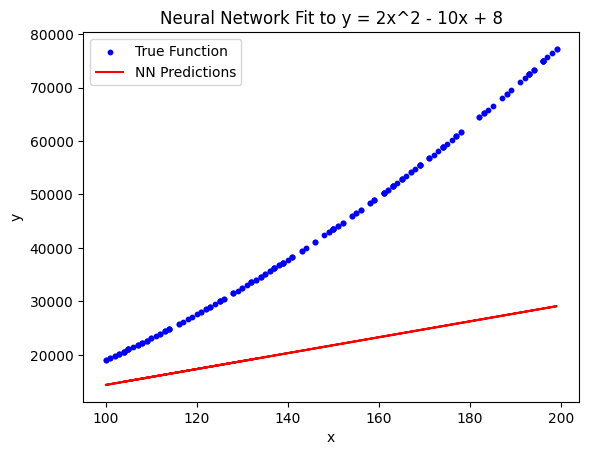

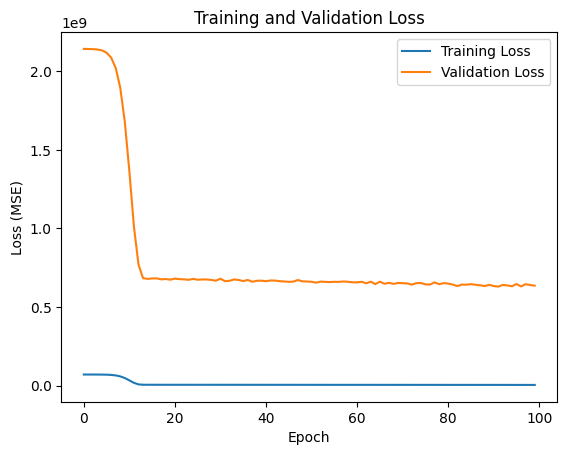

In [8]:

# 6. Make Predictions
y_pred = model.predict(x_test)

# 7. Visualize Results
plt.scatter(x_test, y_test, label='True Function', color='blue', s=10)
plt.plot(x_test, y_pred, label='NN Predictions', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Fit to y = 2x^2 - 10x + 8')
plt.legend()
plt.show()

# 8. Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()